In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,f1_score,precision_score,recall_score,roc_auc_score

In [2]:
data = pd.read_csv("statlog.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    float64
 1   sex       270 non-null    float64
 2   cp        270 non-null    float64
 3   trestbps  270 non-null    float64
 4   chol      270 non-null    float64
 5   fbs       270 non-null    float64
 6   restecg   270 non-null    float64
 7   thalach   270 non-null    float64
 8   exang     270 non-null    float64
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    float64
 11  ca        270 non-null    float64
 12  thal      270 non-null    float64
 13  presence  270 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 29.7 KB


# Check for missing values

<AxesSubplot:>

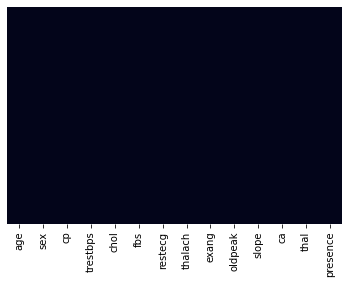

In [5]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

# Check for impossible values(a value that should not be zero, example is blood pressure)

<AxesSubplot:>

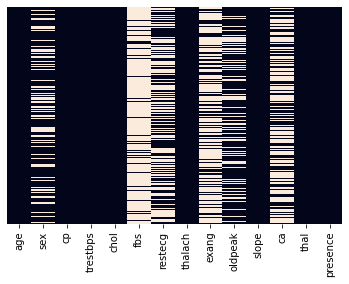

In [6]:
sns.heatmap(data==0,cbar=False,yticklabels=False)

In [7]:
data_numerical = data[["age","trestbps","chol","thalach","oldpeak","presence"]]
data_numerical

,age,trestbps,chol,thalach,oldpeak,presence
0,70.0,130.0,322.0,109.0,2.4,2
1,67.0,115.0,564.0,160.0,1.6,1
2,57.0,124.0,261.0,141.0,0.3,2
3,64.0,128.0,263.0,105.0,0.2,1
4,74.0,120.0,269.0,121.0,0.2,1
...,...,...,...,...,...,...
265,52.0,172.0,199.0,162.0,0.5,1
266,44.0,120.0,263.0,173.0,0.0,1
267,56.0,140.0,294.0,153.0,1.3,1
268,57.0,140.0,192.0,148.0,0.4,1


In [8]:
data_nominal = data.drop(data_numerical,axis=1)
data_nominal['presence'] = data['presence']
data_nominal

,sex,cp,fbs,restecg,exang,slope,ca,thal,presence
0,1.0,4.0,0.0,2.0,0.0,2.0,3.0,3.0,2
1,0.0,3.0,0.0,2.0,0.0,2.0,0.0,7.0,1
2,1.0,2.0,0.0,0.0,0.0,1.0,0.0,7.0,2
3,1.0,4.0,0.0,0.0,1.0,2.0,1.0,7.0,1
4,0.0,2.0,0.0,2.0,1.0,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...
265,1.0,3.0,1.0,0.0,0.0,1.0,0.0,7.0,1
266,1.0,2.0,0.0,0.0,0.0,1.0,0.0,7.0,1
267,0.0,2.0,0.0,2.0,0.0,2.0,0.0,3.0,1
268,1.0,4.0,0.0,0.0,0.0,2.0,0.0,6.0,1


# Visualizing numerical features

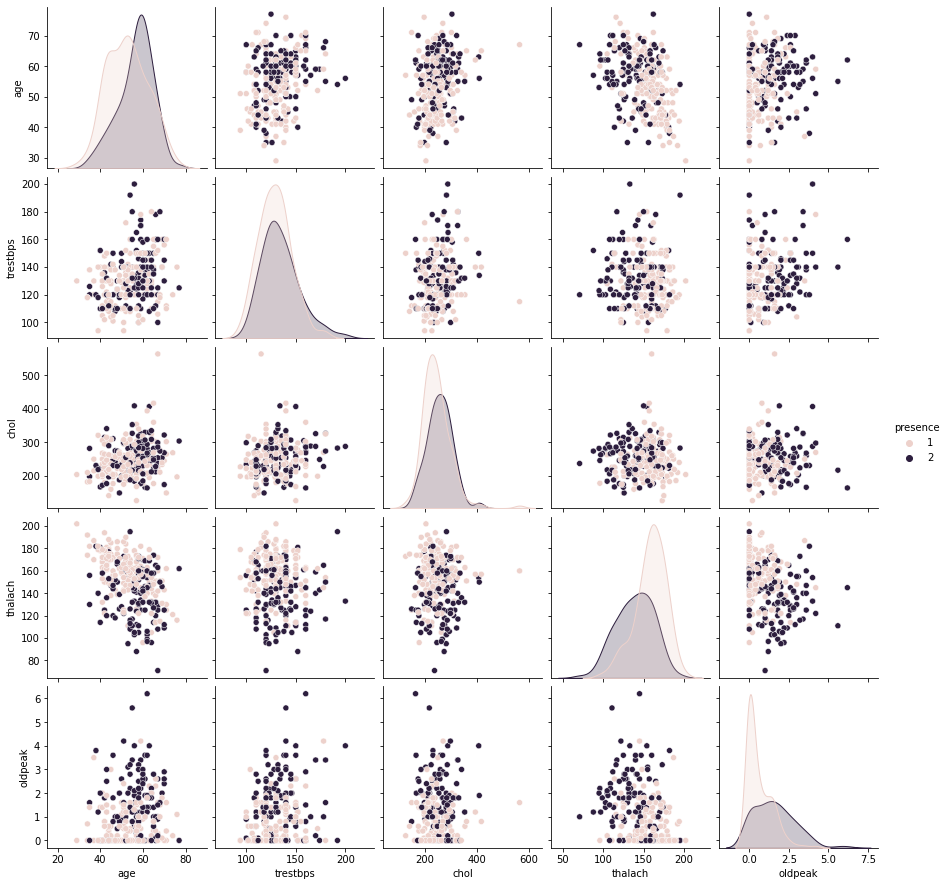

In [9]:
sns.pairplot(data_numerical,hue='presence')

# Visualizing nominal features

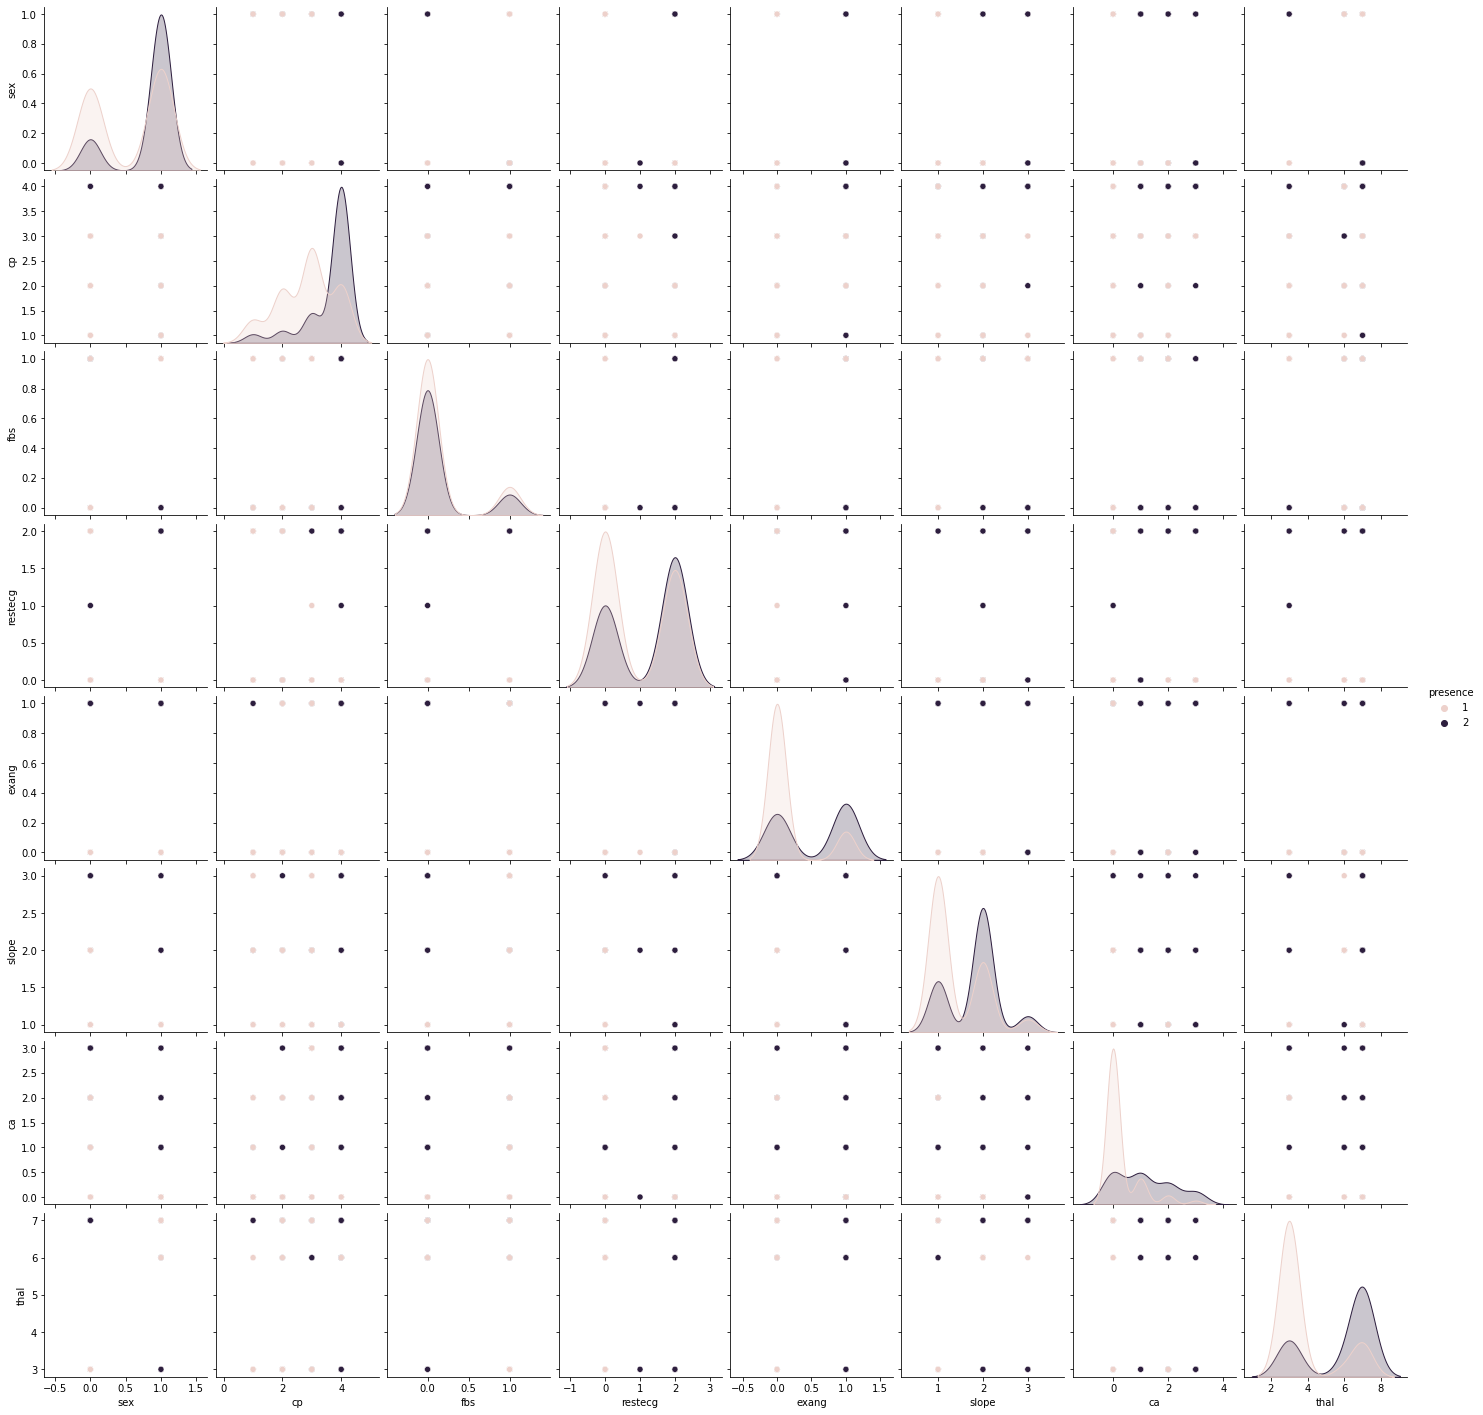

In [10]:
sns.pairplot(data_nominal,hue='presence')

In [11]:
data_numerical

,age,trestbps,chol,thalach,oldpeak,presence
0,70.0,130.0,322.0,109.0,2.4,2
1,67.0,115.0,564.0,160.0,1.6,1
2,57.0,124.0,261.0,141.0,0.3,2
3,64.0,128.0,263.0,105.0,0.2,1
4,74.0,120.0,269.0,121.0,0.2,1
...,...,...,...,...,...,...
265,52.0,172.0,199.0,162.0,0.5,1
266,44.0,120.0,263.0,173.0,0.0,1
267,56.0,140.0,294.0,153.0,1.3,1
268,57.0,140.0,192.0,148.0,0.4,1


# Data Distribution for Numerical Features

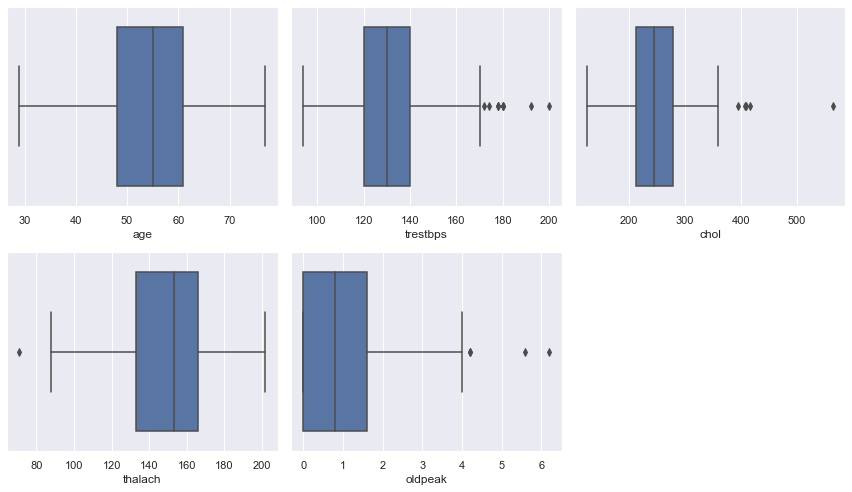

In [12]:
sns.set(rc={"figure.figsize":(12, 7)})
for i in range(len(data_numerical.iloc[:,:-1].columns)):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=data_numerical.iloc[:,:-1],x=data_numerical.iloc[:,:-1].columns[i])
    
plt.tight_layout()

In [13]:
data_nominal

,sex,cp,fbs,restecg,exang,slope,ca,thal,presence
0,1.0,4.0,0.0,2.0,0.0,2.0,3.0,3.0,2
1,0.0,3.0,0.0,2.0,0.0,2.0,0.0,7.0,1
2,1.0,2.0,0.0,0.0,0.0,1.0,0.0,7.0,2
3,1.0,4.0,0.0,0.0,1.0,2.0,1.0,7.0,1
4,0.0,2.0,0.0,2.0,1.0,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...
265,1.0,3.0,1.0,0.0,0.0,1.0,0.0,7.0,1
266,1.0,2.0,0.0,0.0,0.0,1.0,0.0,7.0,1
267,0.0,2.0,0.0,2.0,0.0,2.0,0.0,3.0,1
268,1.0,4.0,0.0,0.0,0.0,2.0,0.0,6.0,1


# Count of unique values for nomianl features interms of Presence

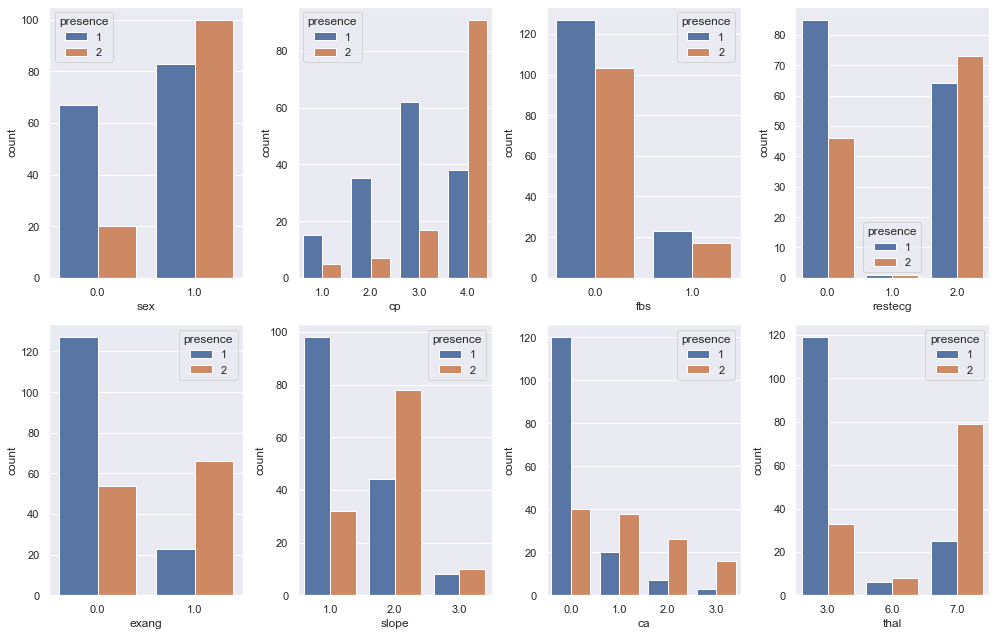

In [14]:
sns.set(rc={"figure.figsize":(14, 9)})
for i in range(len(data_nominal.iloc[:,:-1].columns)):
    plt.subplot(2,4,i+1)
    sns.countplot(data=data_nominal,x=data_nominal.columns[i],hue='presence')
    
plt.tight_layout()

# Count for unique values of presence features

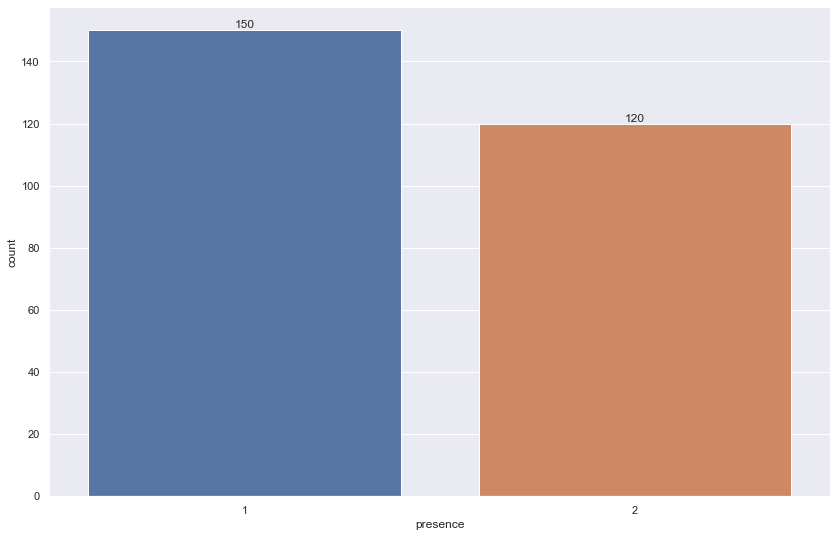

In [15]:
ax = sns.countplot(data=data,x='presence')
ax.bar_label(ax.containers[0])
plt.show()

## Observation: the presence feature is slightly unbalanced

In [16]:
X = data.drop('presence',axis=1) 
y = data['presence']

In [17]:
accuracy_scoring = []
f1_scoring = []
precision_scoring = []
recall_scoring = []
roc_scoring = []
model_naming = []
train_score = []
test_score = []

def test_eval(model,X_test,y_test,model_name = "NONE"):
    model_pred_train = model.predict(X_train)
    model_pred_test = model.predict(X_test)
    
    train_score.append(mean_absolute_error(y_train,model_pred_train))
    test_score.append(mean_absolute_error(y_test,model_pred_test))
    accuracy_scoring.append(accuracy_score(y_test,model_pred_test))
    f1_scoring.append(f1_score(y_test,model_pred_test))
    precision_scoring.append(precision_score(y_test,model_pred_test))
    recall_scoring.append(recall_score(y_test,model_pred_test))
    roc_scoring.append(roc_auc_score(y_test,model_pred_test))
    model_naming.append(model_name)    

In [18]:
pipe_rf = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("forest",RandomForestClassifier(criterion= 'entropy', max_features= 'sqrt', n_estimators= 100))])

pipe_svm = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("svm",SVC(C= 100, gamma= 1, kernel= 'rbf'))])

pipe_knn = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("knn",KNeighborsClassifier(algorithm = 'auto', n_neighbors = 3, weights = 'distance'))])

pipe_ada = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("ada",AdaBoostClassifier(algorithm = 'SAMME.R', learning_rate = 0.5, n_estimators = 1000))])

pipe_mlp = Pipeline([('scaler',StandardScaler()),
                   ('pca',PCA(n_components=0.95)),
                   ('mlp',MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=300,
                                        activation='relu',solver='adam', random_state=1))])

ensemble_model = [("forest",pipe_rf),("svm",pipe_svm),("knn",pipe_knn),("ada",pipe_ada),("mlp",pipe_mlp)]

pipe_stacking = Pipeline([("Stacking",StackingClassifier(estimators=ensemble_model, 
                                                         final_estimator=LogisticRegression(random_state=101)))])

final_models = [pipe_rf,pipe_svm,pipe_knn,pipe_ada,pipe_mlp,pipe_stacking]
model_names = {0:"Random Forest",1:"SVM",2:"KNN",3:"AdaBoost",4:"Stacking"}

In [19]:
skf = StratifiedKFold(n_splits=10)

In [20]:
for train_index,test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    
    #random forest
    final_models[0].fit(X_train,y_train)
    test_eval(final_models[0],X_test,y_test,model_names[0])
    
    #svm
    final_models[1].fit(X_train,y_train)
    test_eval(final_models[1],X_test,y_test,model_names[1])
    
    #knn
    final_models[2].fit(X_train,y_train)
    test_eval(final_models[2],X_test,y_test,model_names[2])
    
    #adaboost
    final_models[3].fit(X_train,y_train)
    test_eval(final_models[3],X_test,y_test,model_names[3])
    
    #stacking
    final_models[4].fit(X_train,y_train)
    test_eval(final_models[4],X_test,y_test,model_names[4])

In [21]:
res_df = pd.DataFrame({'Train':train_score,'Test':test_score,'Accuracy Score':accuracy_scoring,'F1-Score':f1_scoring,
                       'Precsion':precision_scoring,'Recall':recall_scoring,'ROC AUC Score':roc_scoring,'Model':model_naming})
#res_df

In [22]:
forest_res = res_df[res_df['Model'] == 'Random Forest']
svm_res = res_df[res_df['Model'] == 'SVM']
knn_res = res_df[res_df['Model'] == 'KNN']
ada_res = res_df[res_df['Model'] == 'AdaBoost']
stacking_res = res_df[res_df['Model'] == 'Stacking']

model_compile = [forest_res,svm_res,knn_res,ada_res,stacking_res]

# Visuzaling if the data is overfit using different kind of models

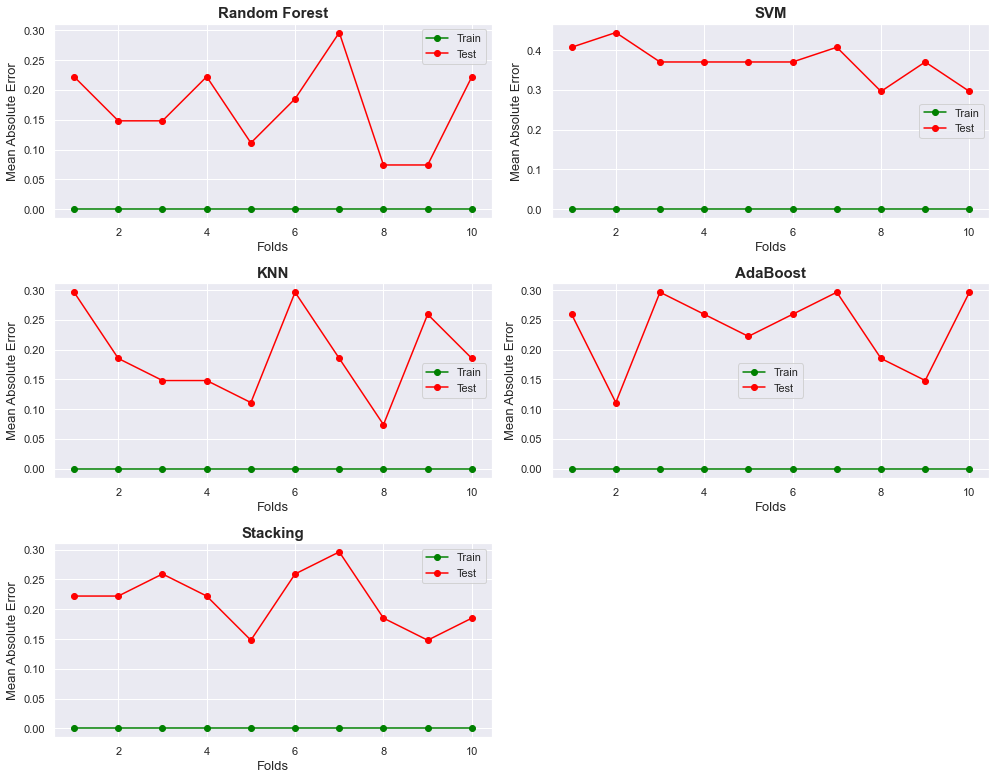

In [23]:
sns.set(rc={"figure.figsize":(14, 11)})

folds = range(1,skf.get_n_splits()+1)
for i,models in enumerate(model_compile):
    plt.subplot(3,2,i+1)
    plt.plot(folds,models["Train"],'o-',color='green',label="Train")
    plt.plot(folds,models["Test"],'o-',color='red',label="Test")
    plt.xlabel("Folds",fontsize=13)
    plt.ylabel("Mean Absolute Error",fontsize=13)
    plt.title(model_names[i],fontsize=15,fontweight='bold')
    plt.legend()

plt.tight_layout()

# Observation: all of the model is overfit since the range between train set and test set is around 0.4, We will use different techniques to reduced the overfitting of the models

In [24]:
sampler = RandomOverSampler()

X_sampler,y_sampler = sampler.fit_resample(X,y)

data_resample = pd.concat([X_sampler,y_sampler],axis=1)

# Applying Random Over Sampling to avoid imbalance dataset

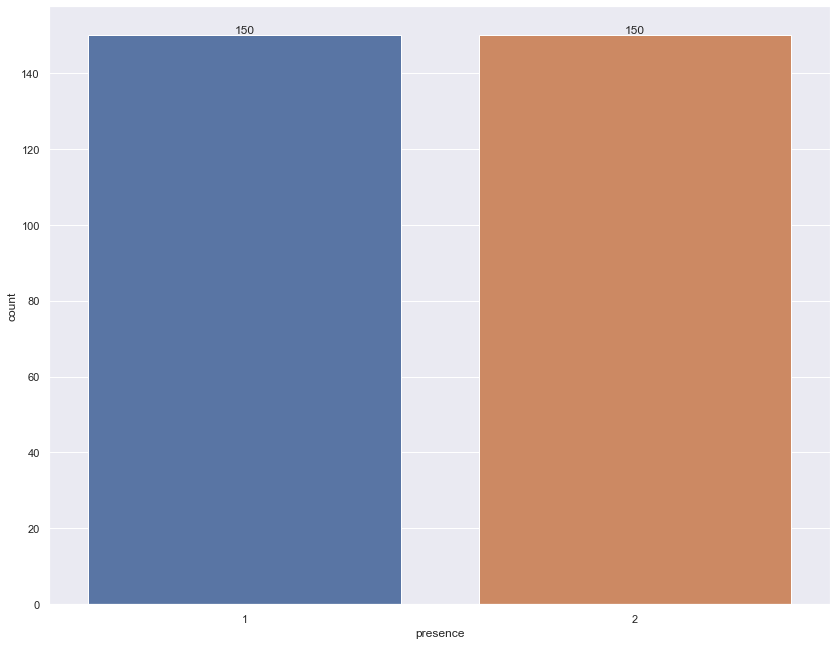

In [25]:
ax = sns.countplot(data=data_resample,x='presence')
ax.bar_label(ax.containers[0])
plt.show()

In [26]:
X = data_resample.drop('presence',axis=1) 
y = data_resample['presence']

In [27]:
accuracy_scoring = []
f1_scoring = []
precision_scoring = []
recall_scoring = []
roc_scoring = []
model_naming = []
train_score = []
test_score = []


def test_eval(model,X_test,y_test,model_name = "NONE"):
    model_pred_train = model.predict(X_train)
    model_pred_test = model.predict(X_test)
    
    
    train_score.append(mean_absolute_error(y_train,model_pred_train))
    test_score.append(mean_absolute_error(y_test,model_pred_test))
    accuracy_scoring.append(accuracy_score(y_test,model_pred_test))
    f1_scoring.append(f1_score(y_test,model_pred_test))
    precision_scoring.append(precision_score(y_test,model_pred_test))
    recall_scoring.append(recall_score(y_test,model_pred_test))
    roc_scoring.append(roc_auc_score(y_test,model_pred_test))
    model_naming.append(model_name)    

In [28]:
pipe_rf = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("forest",RandomForestClassifier(criterion= 'entropy', max_features= 'sqrt', n_estimators= 100))])

pipe_svm = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("svm",SVC(C= 100, gamma= 1, kernel= 'rbf'))])

pipe_knn = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("knn",KNeighborsClassifier(algorithm = 'auto', n_neighbors = 3, weights = 'distance'))])

pipe_ada = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("ada",AdaBoostClassifier(algorithm = 'SAMME.R', learning_rate = 0.5, n_estimators = 1000))])

pipe_mlp = Pipeline([('scaler',StandardScaler()),
                   ('pca',PCA(n_components=0.95)),
                   ('mlp',MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=300,
                                        activation='relu',solver='adam', random_state=1))])

ensemble_model = [("forest",pipe_rf),("svm",pipe_svm),("knn",pipe_knn),("ada",pipe_ada),("mlp",pipe_mlp)]

pipe_stacking = Pipeline([("Stacking",StackingClassifier(estimators=ensemble_model, 
                                                         final_estimator=LogisticRegression(random_state=101)))])

final_models = [pipe_rf,pipe_svm,pipe_knn,pipe_ada,pipe_mlp,pipe_stacking]
model_names = {0:"Random Forest",1:"SVM",2:"KNN",3:"AdaBoost",4:"Stacking"}

In [29]:
for train_index,test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    
    #random forest
    final_models[0].fit(X_train,y_train)
    test_eval(final_models[0],X_test,y_test,model_names[0])
    
    #svm
    final_models[1].fit(X_train,y_train)
    test_eval(final_models[1],X_test,y_test,model_names[1])
    
    #knn
    final_models[2].fit(X_train,y_train)
    test_eval(final_models[2],X_test,y_test,model_names[2])
    
    #adaboost
    final_models[3].fit(X_train,y_train)
    test_eval(final_models[3],X_test,y_test,model_names[3])
    
    #stacking
    final_models[4].fit(X_train,y_train)
    test_eval(final_models[4],X_test,y_test,model_names[4])

In [30]:
res_df = pd.DataFrame({'Train':train_score,'Test':test_score,'Accuracy Score':accuracy_scoring,'F1-Score':f1_scoring,
                       'Precsion':precision_scoring,'Recall':recall_scoring,'ROC AUC Score':roc_scoring,'Model':model_naming})
#res_df

In [31]:
forest_res = res_df[res_df['Model'] == 'Random Forest']
svm_res = res_df[res_df['Model'] == 'SVM']
knn_res = res_df[res_df['Model'] == 'KNN']
ada_res = res_df[res_df['Model'] == 'AdaBoost']
stacking_res = res_df[res_df['Model'] == 'Stacking']

model_compile = [forest_res,svm_res,knn_res,ada_res,stacking_res]

# Visuzaling if the data is overfit using different kind of models

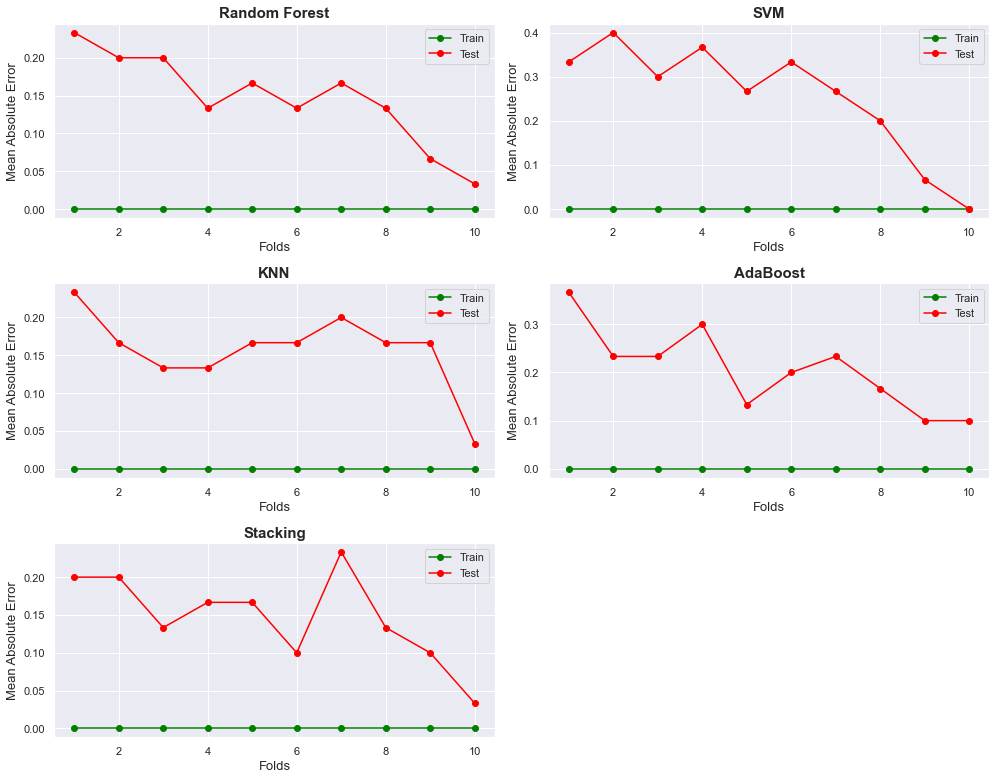

In [32]:
sns.set(rc={"figure.figsize":(14, 11)})

folds = range(1,skf.get_n_splits()+1)
for i,models in enumerate(model_compile):
    plt.subplot(3,2,i+1)
    plt.plot(folds,models["Train"],'o-',color='green',label="Train")
    plt.plot(folds,models["Test"],'o-',color='red',label="Test")
    plt.xlabel("Folds",fontsize=13)
    plt.ylabel("Mean Absolute Error",fontsize=13)
    plt.title(model_names[i],fontsize=15,fontweight='bold')
    plt.legend()

plt.tight_layout()

# Model Metric Scores

In [33]:
forest_metrics = []
svm_metrics = []
knn_metrics = []
ada_metrics = []
stacking_metrics = []
x_names = ['Accuracy Score','F1-Score','Precision','Recall','ROC AUC Score']

forest_metrics.append(forest_res.drop(['Train','Test'],axis=1).mean().values)
svm_metrics.append(svm_res.drop(['Train','Test'],axis=1).mean().values)
knn_metrics.append(knn_res.drop(['Train','Test'],axis=1).mean().values)
ada_metrics.append(ada_res.drop(['Train','Test'],axis=1).mean().values)
stacking_metrics.append(stacking_res.drop(['Train','Test'],axis=1).mean().values)

metric_values = np.array([forest_metrics,svm_metrics,knn_metrics,ada_metrics,stacking_metrics]).flatten()

In [34]:
metric_values = metric_values.reshape(5,5)
metric_values

array([[0.85333333, 0.85007598, 0.8743985 , 0.83333333, 0.85333333],
       [0.74666667, 0.79871045, 0.70308795, 0.95333333, 0.74666667],
       [0.84333333, 0.8299708 , 0.90273449, 0.78      , 0.84333333],
       [0.79333333, 0.78472605, 0.81663866, 0.76666667, 0.79333333],
       [0.85333333, 0.85334589, 0.86035492, 0.85333333, 0.85333333]])

In [35]:
metrics_df = pd.DataFrame(metric_values,columns=x_names)
metrics_df['Model'] = ['Random Forest','SVM','KNN','AdaBoost','Stacking']
metrics_df

,Accuracy Score,F1-Score,Precision,Recall,ROC AUC Score,Model
0,0.853333,0.850076,0.874398,0.833333,0.853333,Random Forest
1,0.746667,0.798710,0.703088,0.953333,0.746667,SVM
2,0.843333,0.829971,0.902734,0.780000,0.843333,KNN
3,0.793333,0.784726,0.816639,0.766667,0.793333,AdaBoost
4,0.853333,0.853346,0.860355,0.853333,0.853333,Stacking


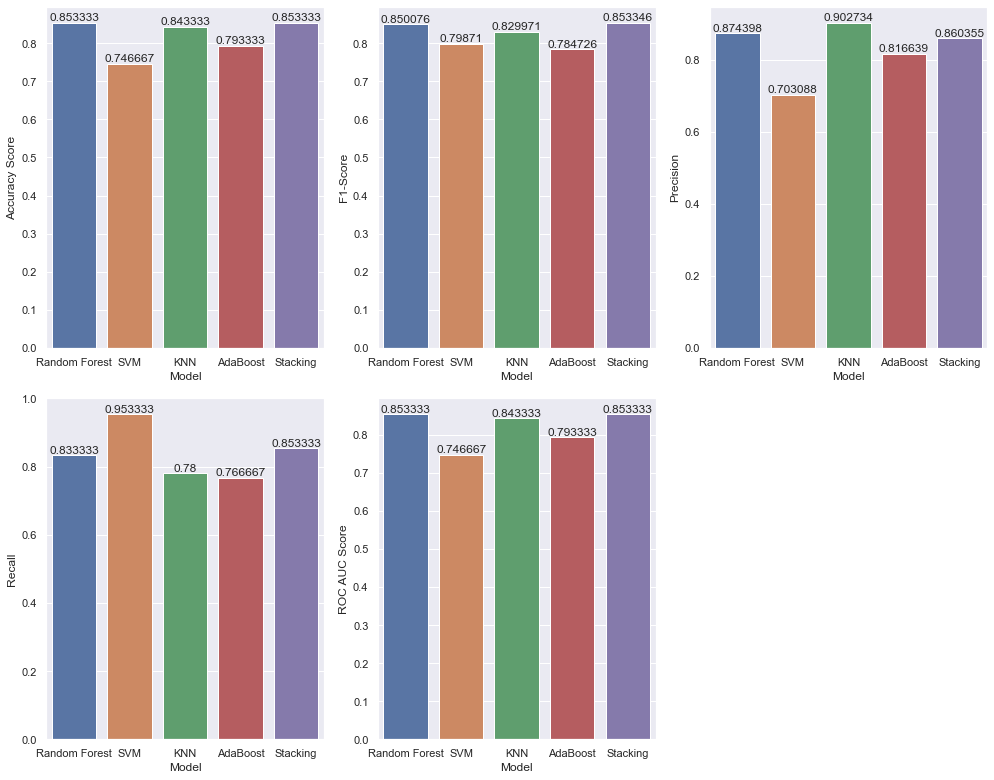

In [36]:
metrics_name = {0:'Accuracy Score',1:'F1-Score',2:'Precision',3:'Recall',4:'ROC AUC Score'}

for i in range(0,5):
    plt.subplot(2,3,i+1)
    ax = sns.barplot(data=metrics_df,x='Model',y=metrics_name[i])
    ax.bar_label(ax.containers[0])
    
plt.tight_layout()

# Observation 1: after using random oversampling, our model's overfitting is slightly reduced as seen in random forest, knn and stacking figures

# Observation 2: upon using Stacking techniques, the accuracy score is the same random forest, indicating that stacking can be as powerful as the best model in the weak learners

# Observation 3: our model did not achieved the desired good fit, however upon applying random oversampling, our model's performance improve a little. Adding more data in our dataset could be the solution to fully address the overfitting and low metrics score.